In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv("/kaggle/input/car-price-dataset/car_price_dataset.csv")
data.head() 
#column year means carAge 

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [3]:
cols = data.columns.to_list()
for c in cols:
    print('---------------- Description of',c,'---------------------\t')
    print(data[c].describe(),'\n')

---------------- Description of Brand ---------------------	
count     10000
unique       10
top        Ford
freq       1048
Name: Brand, dtype: object 

---------------- Description of Model ---------------------	
count      10000
unique        30
top       Accord
freq         365
Name: Model, dtype: object 

---------------- Description of Year ---------------------	
count    10000.000000
mean      2011.543700
std          6.897699
min       2000.000000
25%       2006.000000
50%       2012.000000
75%       2017.000000
max       2023.000000
Name: Year, dtype: float64 

---------------- Description of Engine_Size ---------------------	
count    10000.000000
mean         3.000560
std          1.149324
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Engine_Size, dtype: float64 

---------------- Description of Fuel_Type ---------------------	
count        10000
unique           4
top       Electric
freq          2625
Nam

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [5]:
data.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sns.set_theme(
    style="whitegrid",
    palette="deep",
    font_scale=1.3
)
plt.rcParams["figure.figsize"] = (10, 6)

/tmp/ipykernel_17/885766230.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Fuel_Type'] ,ax=axes[1,0], palette="Set2")
/tmp/ipykernel_17/885766230.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Fuel_Type'] , y=data['Price'], ax=axes[1,1], palette="muted")


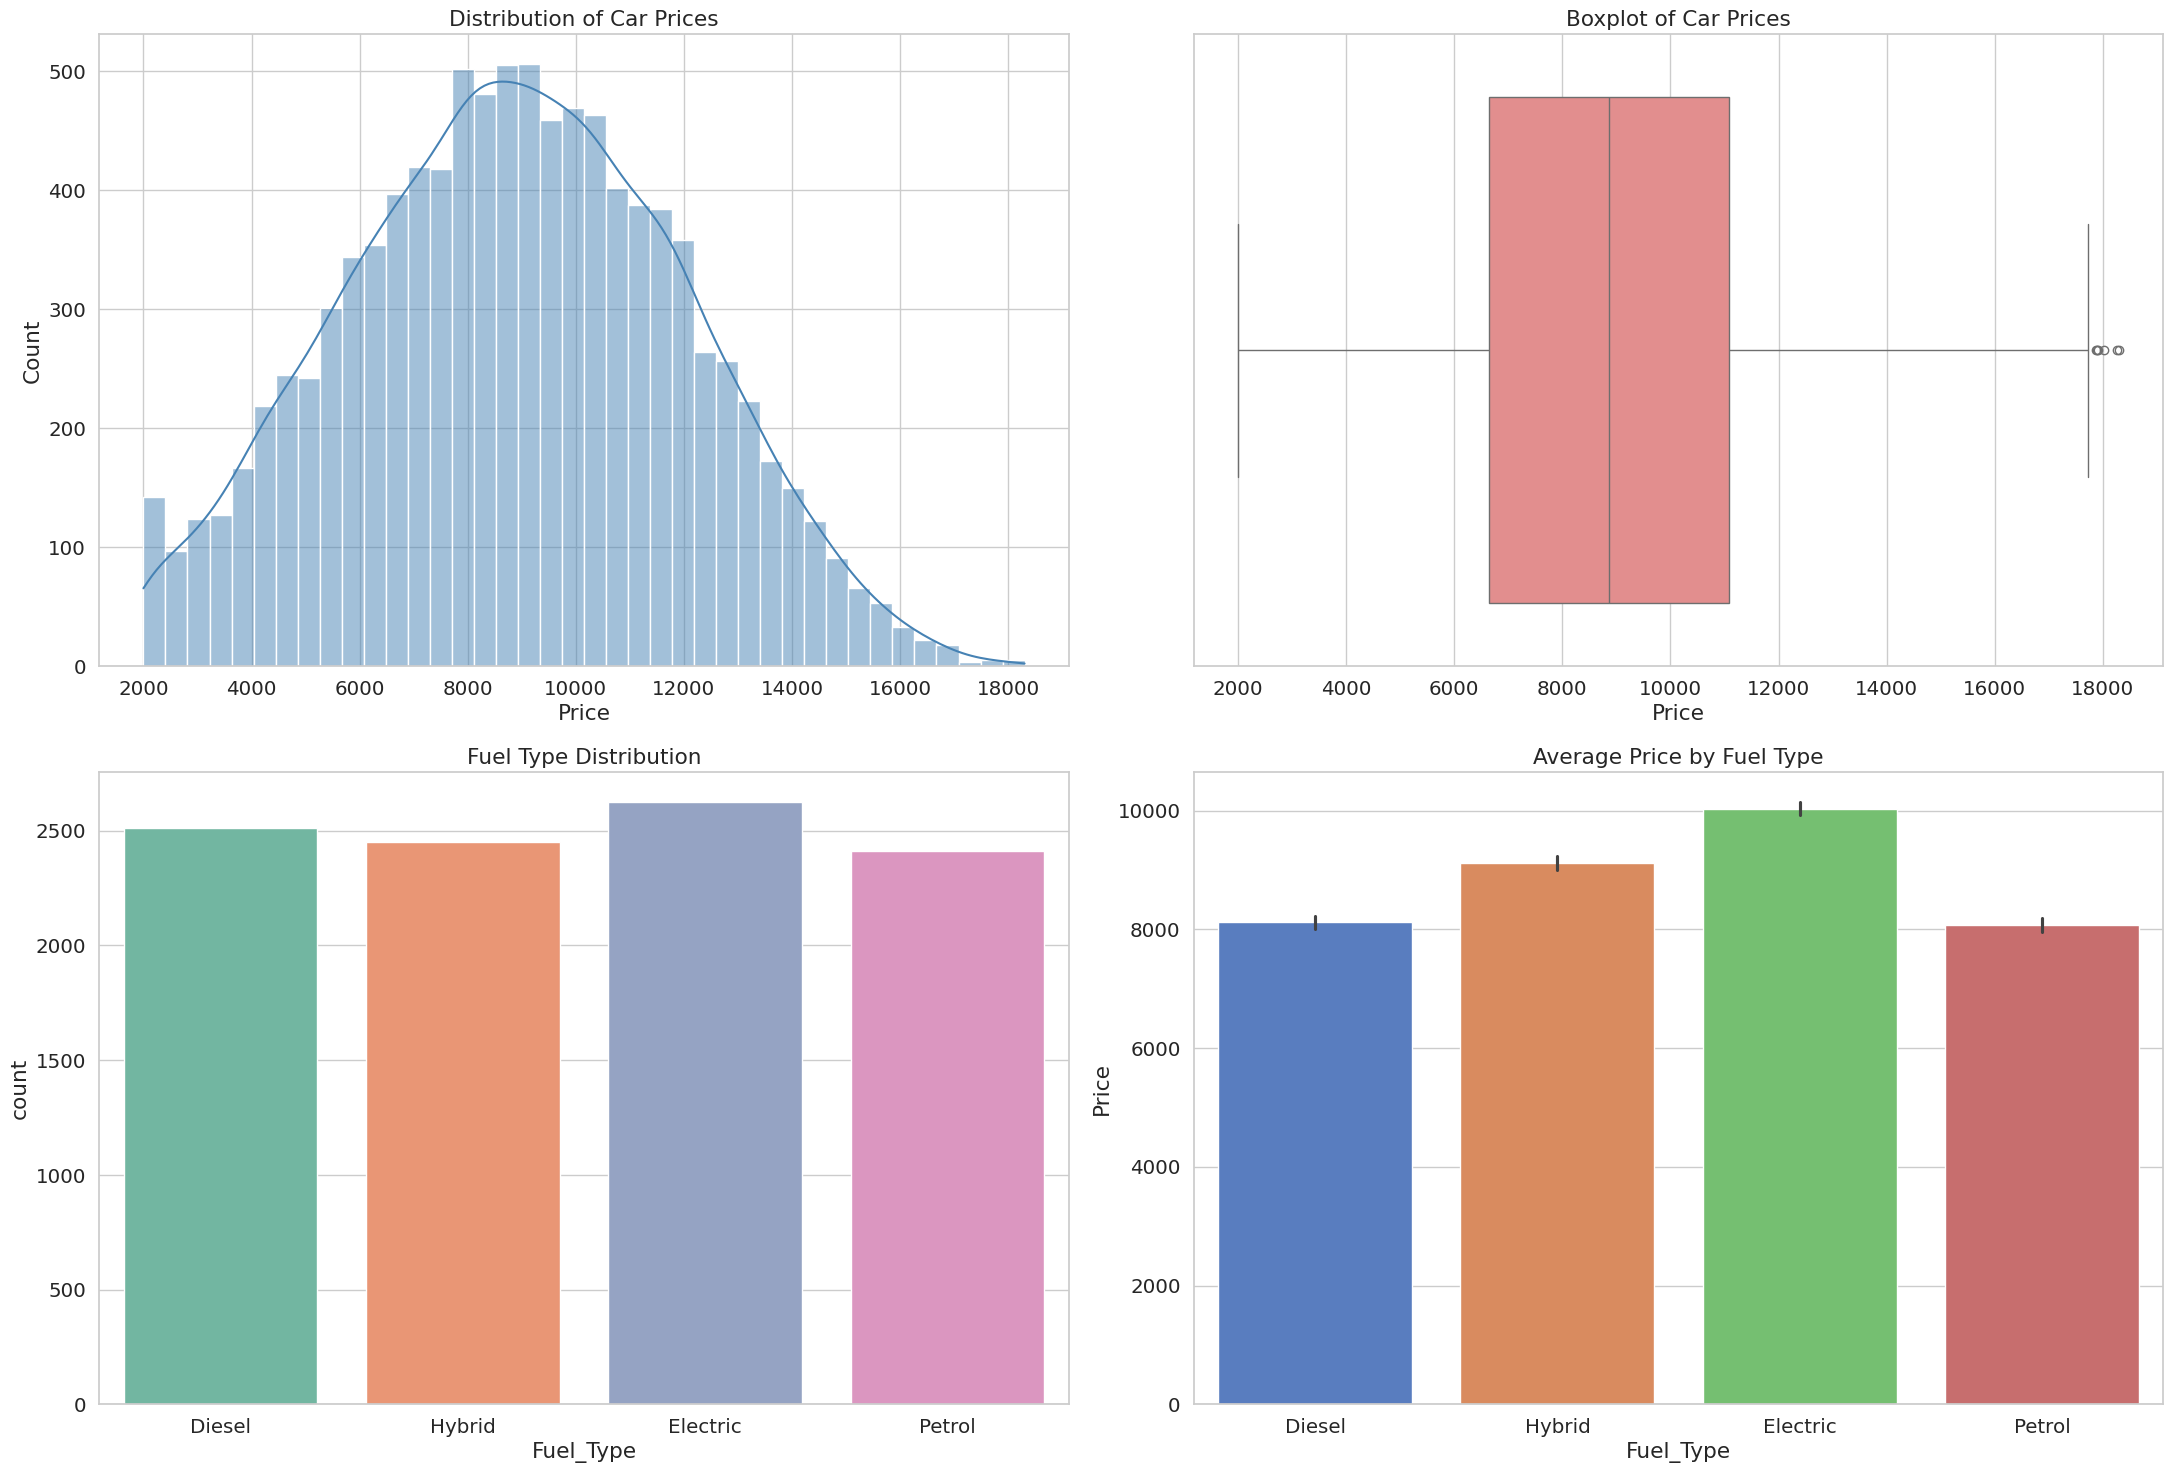

In [8]:
fig , axes = plt.subplots(2,2 , figsize=(22,15))

sns.histplot(data["Price"],kde=True, ax=axes[0,0],color="steelblue")
axes[0,0].set_title("Distribution of Car Prices")

sns.boxplot(x=data['Price'], ax=axes[0,1], color="lightcoral")
axes[0,1].set_title('Boxplot of Car Prices')

sns.countplot(x=data['Fuel_Type'] ,ax=axes[1,0], palette="Set2")
axes[1,0].set_title('Fuel Type Distribution')

sns.barplot(x=data['Fuel_Type'] , y=data['Price'], ax=axes[1,1], palette="muted")
axes[1,1].set_title('Average Price by Fuel Type')

plt.tight_layout()
plt.show()

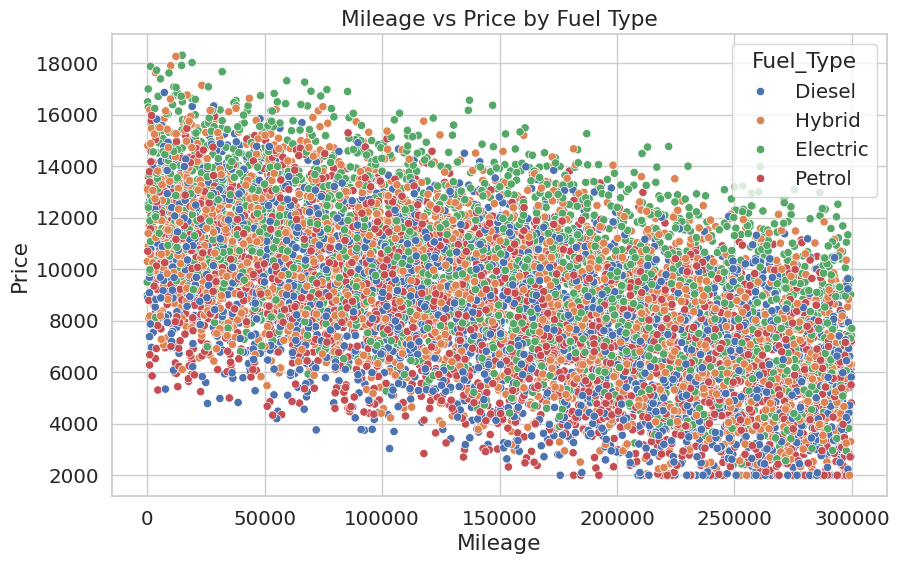

In [9]:
sns.scatterplot(
    x="Mileage",
    y="Price",
    hue="Fuel_Type",
    data=data
)
plt.title("Mileage vs Price by Fuel Type")
plt.show()

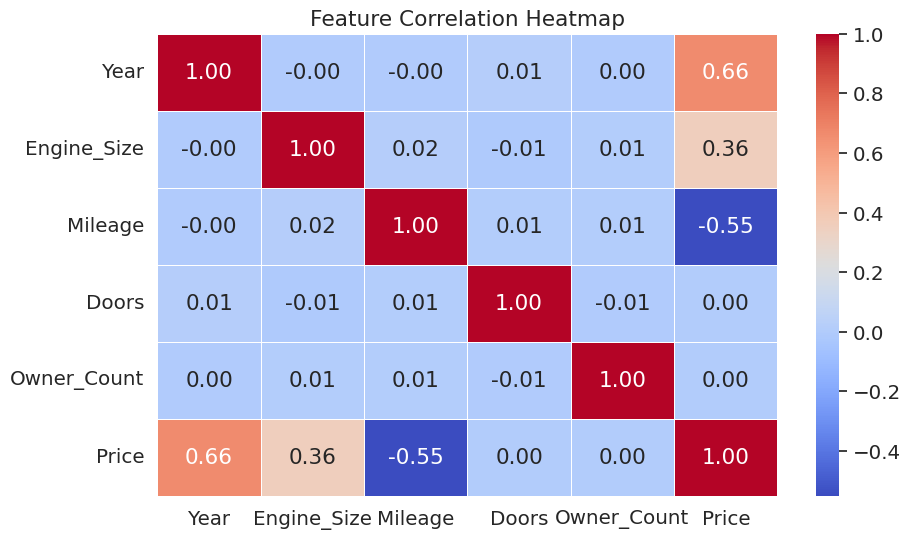

In [10]:
corr = data.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

**Feature Engineering**

In [11]:
from datetime import datetime
now = datetime.now()
year = int(now.strftime("%Y"))
year

2026

In [12]:
data['Car_Age'] = year - data['Year']
data.head(1)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,Car_Age
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501,6


In [13]:
data['Is_4Door'] = data['Doors'].apply(lambda x: 1 if x==4 else 0)
data

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,Car_Age,Is_4Door
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501,6,0
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092,14,0
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171,6,1
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780,3,0
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884,22,0
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240,24,0
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866,16,0
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084,24,1


In [14]:
data['Sport_Car'] = data['Is_4Door'].apply(lambda x : 1 if x == 0 else 0)
d = data.drop(columns = 'Is_4Door')
d = d.drop(columns = ['Year','Doors'])
d['Mileage_per_Year'] = d['Mileage'] / d['Car_Age'] #This feature tells the model how intensively the car was used, not just the total distance
d.head()

,Brand,Model,Engine_Size,Fuel_Type,Transmission,Mileage,Owner_Count,Price,Car_Age,Sport_Car,Mileage_per_Year
0,Kia,Rio,4.2,Diesel,Manual,289944,5,8501,6,1,48324.000000
1,Chevrolet,Malibu,2.0,Hybrid,Automatic,5356,3,12092,14,1,382.571429
2,Mercedes,GLA,4.2,Diesel,Automatic,231440,2,11171,6,0,38573.333333
3,Audi,Q5,2.0,Electric,Manual,160971,1,11780,3,1,53657.000000
4,Volkswagen,Golf,2.6,Hybrid,Semi-Automatic,286618,3,2867,23,1,12461.652174


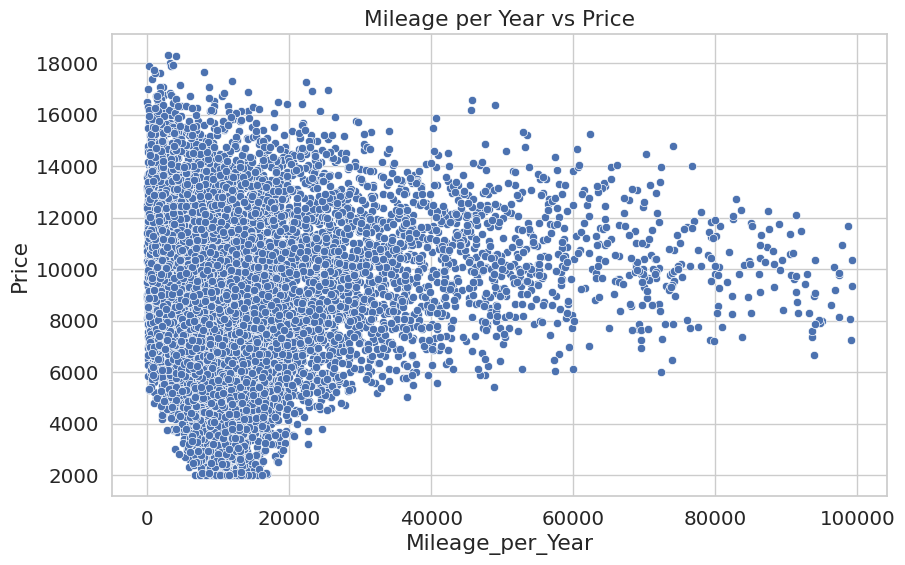

In [15]:
sns.scatterplot(x='Mileage_per_Year', y='Price', data=d)
plt.title("Mileage per Year vs Price")
plt.show()

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
d.head(1)

,Brand,Model,Engine_Size,Fuel_Type,Transmission,Mileage,Owner_Count,Price,Car_Age,Sport_Car,Mileage_per_Year
0,Kia,Rio,4.2,Diesel,Manual,289944,5,8501,6,1,48324.0


In [17]:
numerical_features = ['Engine_Size','Mileage','Owner_Count','Car_Age','Mileage_per_Year']
categorical_features = ['Fuel_Type', 'Transmission']

In [18]:
preprocessor = ColumnTransformer(
    transformers =[
        ('num', StandardScaler(),numerical_features),
        ('cat', OneHotEncoder(drop='first'),categorical_features)
    ] 
)

In [19]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = d.drop(columns = 'Price')
y = d['Price']

In [22]:
X_train , X_test , y_train , y_test = train_test_split(X,y ,test_size = 0.2 , random_state = 42)

In [23]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Engine_Size', 'Mileage',
                                                   'Owner_Count', 'Car_Age',
                                                   'Mileage_per_Year']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Fuel_Type',
                                                   'Transmission'])])),
                ('model', LinearRegression())])

In [24]:
from sklearn.metrics import mean_absolute_error, r2_score 
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)


y_pred = pipeline.predict(X_test)

mae_scores = -cross_val_score(pipeline, X, y, cv=kf, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='r2')
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MAE: 19.46533199464808
R2: 0.9995461200064407


In [25]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

In [26]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
]

In [27]:
results = []

param_grids = {
    'Linear Regression': {},
    'Ridge Regression': {'regressor__alpha':[0.1, 1.0, 10]},
    'Lasso Regression': {'regressor__alpha':[0.01, 0.1, 1.0]},
    'Decision Tree': {'regressor__max_depth':[3,5,7], 
                      'regressor__min_samples_split':[2,5,10]},
    'Random Forest': {'regressor__n_estimators':[50,70,90], 
                      'regressor__max_depth':[3,5,7]},
    'Gradient Boosting': {'regressor__n_estimators':[50,70,90], 
                          'regressor__learning_rate':[0.01,0.05,0.1], 
                          'regressor__max_depth':[3,4,5]}
}

for name, model in models:
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    param_grid = param_grids[name]
    
    if param_grid:  # skip if empty
        search = RandomizedSearchCV(pipe, param_distributions=param_grid,
                                    n_iter=5, cv=5, scoring='r2', random_state=42, n_jobs=-1)
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        best_score = search.best_score_
        best_params = search.best_params_
    else:
        # No hyperparameters to tune (Linear Regression)
        pipe.fit(X_train, y_train)
        best_model = pipe
        best_score = best_model.score(X_train, y_train)
        best_params = {}
    
    y_pred = best_model.predict(X_test)
    from sklearn.metrics import r2_score, mean_absolute_error
    test_r2 = r2_score(y_test, y_pred)
    test_mae = mean_absolute_error(y_test, y_pred)
    
    results.append((name, best_score, best_params, test_r2, test_mae))

import pandas as pd
results_df = pd.DataFrame(results, columns=['Model','CV_R2','Best_Params','Test_R2','Test_MAE'])
results_df.sort_values('Test_R2', ascending=False)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,Model,CV_R2,Best_Params,Test_R2,Test_MAE
0,Linear Regression,0.999170,{},0.999546,19.465332
1,Ridge Regression,0.999157,{'regressor__alpha': 0.1},0.999546,19.516634
2,Lasso Regression,0.999157,{'regressor__alpha': 0.1},0.999546,19.708366
5,Gradient Boosting,0.983600,"{'regressor__n_estimators': 50, 'regressor__ma...",0.983809,306.841365
4,Random Forest,0.914236,"{'regressor__n_estimators': 70, 'regressor__ma...",0.909604,753.685275
3,Decision Tree,0.868148,"{'regressor__min_samples_split': 5, 'regressor...",0.860507,921.514345


/tmp/ipykernel_17/3792085787.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CV_R2', y='Model', data=results_df, palette='viridis')


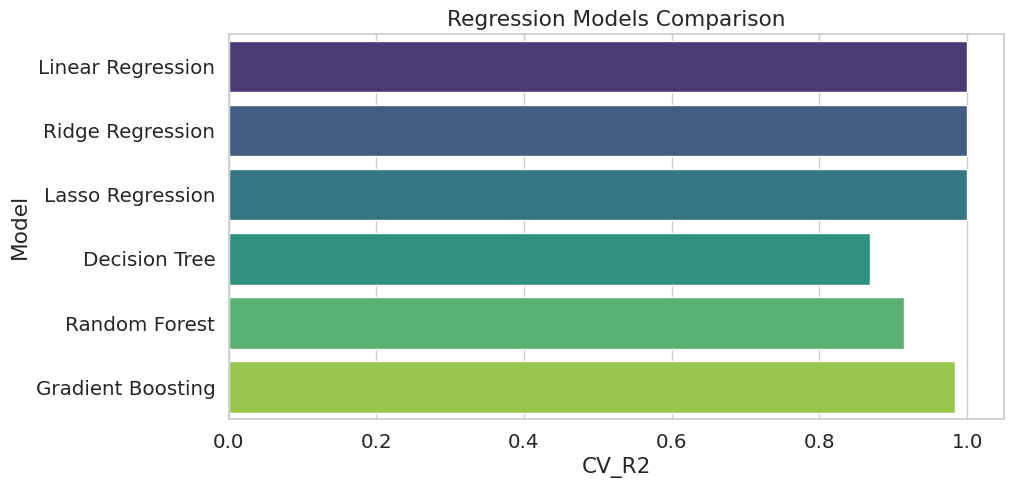

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(x='CV_R2', y='Model', data=results_df, palette='viridis')
plt.title("Regression Models Comparison")
plt.show()